In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/Healthcare Providers.csv'
df = pd.read_csv(file_path)
print(df.head())
# Data Cleaning
print("\nMissing values in each column:")
print(df.isnull().sum())
df = df.drop_duplicates()
df = df.drop_duplicates()
print("\nSummary statistics of numerical features after cleaning:")
print(df.describe())

     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                     

In [ ]:
df['Full Name'] = df['Last Name/Organization Name of the Provider'].fillna('') + ' ' + \
                  df['First Name of the Provider'].fillna('') + ' ' + \
                  df['Middle Initial of the Provider'].fillna('')


df['Full Name'] = df['Full Name'].str.strip()

print(df[['Full Name']].head())

               Full Name
0  UPADHYAYULA SATYASREE
1          JONES WENDY P
2     DUROCHER RICHARD W
3         FULLARD JASPER
4     PERROTTI ANTHONY E


In [ ]:
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '', regex=False)

print(df[['Credentials of the Provider']].head())
print('Periods removed from Credentials column successfully.')

  Credentials of the Provider
0                          MD
1                          MD
2                         DPM
3                          MD
4                          DO
Periods removed from Credentials column successfully.


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Healthcare Providers.csv'
df = pd.read_csv(file_path)

df['Full Name'] = df['Last Name/Organization Name of the Provider'].fillna('') + ' ' + \
                  df['First Name of the Provider'].fillna('') + ' ' + \
                  df['Middle Initial of the Provider'].fillna('')
df['Full Name'] = df['Full Name'].str.strip()
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.', '', regex=False)
from sklearn.preprocessing import LabelEncoder
label_encoder_full_name = LabelEncoder()
df['Full Name Encoded'] = label_encoder_full_name.fit_transform(df['Full Name'])
label_encoder_credentials = LabelEncoder()
df['Credentials Encoded'] = label_encoder_credentials.fit_transform(df['Credentials of the Provider'])
correlation = df[['Full Name Encoded', 'Credentials Encoded']].corr().iloc[0, 1]
print('Correlation between Full Name and Credentials of the Provider:', correlation)

Correlation between Full Name and Credentials of the Provider: 0.04110591618450535


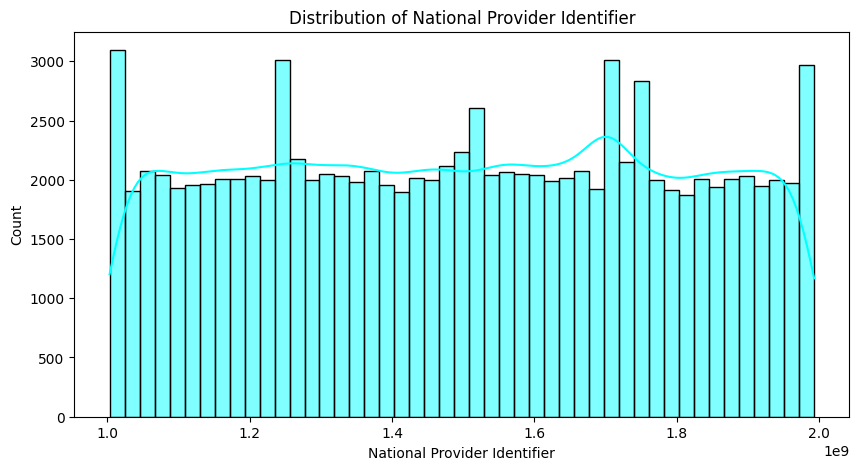

In [ ]:
def plot_distributions(df, cols):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(df[col], kde=True,color = 'cyan')
            plt.title(f'Distribution of {col}')
            plt.show()
        else:
            print(f"Column {col} not found in the dataset.")

numerical_cols = ['National Provider Identifier']
plot_distributions(df, numerical_cols)

•the Bar graph that shows the national providers there are over 3000 who provide the care through the nations.

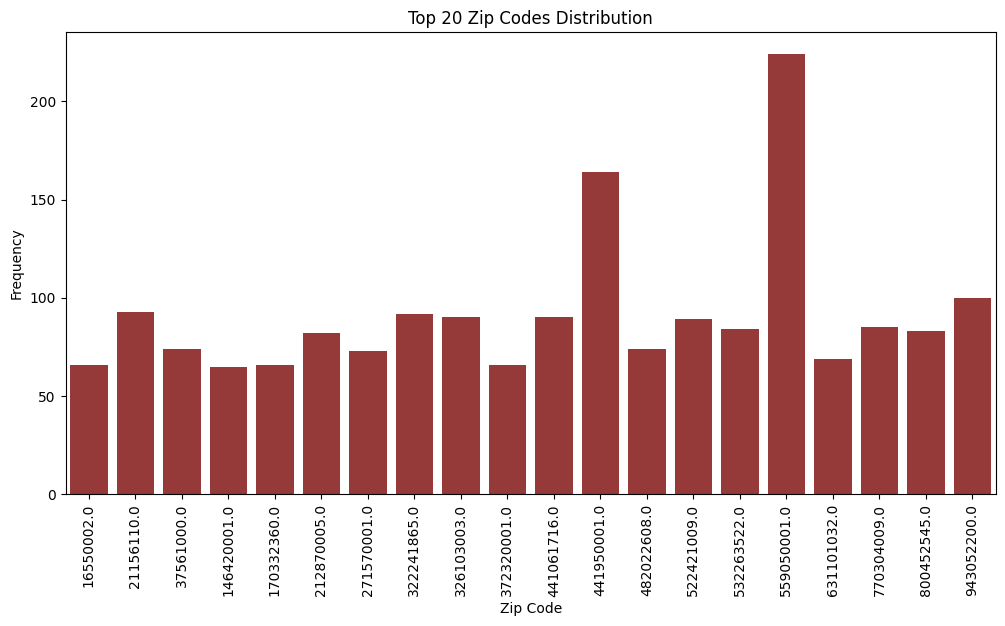

In [ ]:
top_zip_codes = df['Zip Code of the Provider'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_zip_codes.index, y=top_zip_codes.values,color = 'brown')
plt.title('Top 20 Zip Codes Distribution')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

•	In this graph the zipcode has been considered as a catagerical value and then its only distributed as top 20 rows because there are so many unique values .

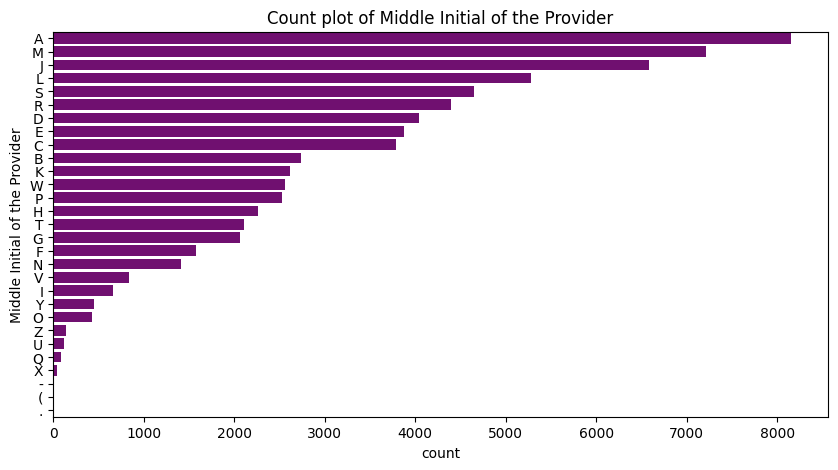

In [ ]:
def plot_countplots(df, cols):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            sns.countplot(y=df[col], order=df[col].value_counts().index, color = 'purple')
            plt.title(f'Count plot of {col}')
            plt.show()
        else:
            print(f"Column {col} not found in the dataset.")
categorical_cols = [
  'Middle Initial of the Provider' ]
plot_countplots(df, categorical_cols)

•	There are so many health care providers  who have middle initial as ‘A ‘.

•	There are least number of health care providers who has middle initial as ‘x’.


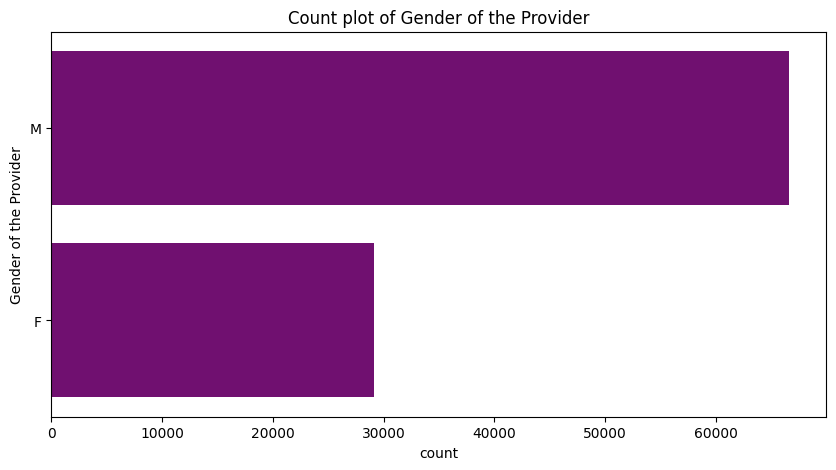

In [ ]:
categorical_cols = [
    'Gender of the Provider'
]
plot_countplots(df, categorical_cols)

•	This dataset has more male healthcare providers compared to female healthcare providers.

<ipython-input-8-2b7118ca18af>:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gender_counts.plot(kind='pie', subplots=True, ax=ax, autopct='%1.1f%%', startangle=90)


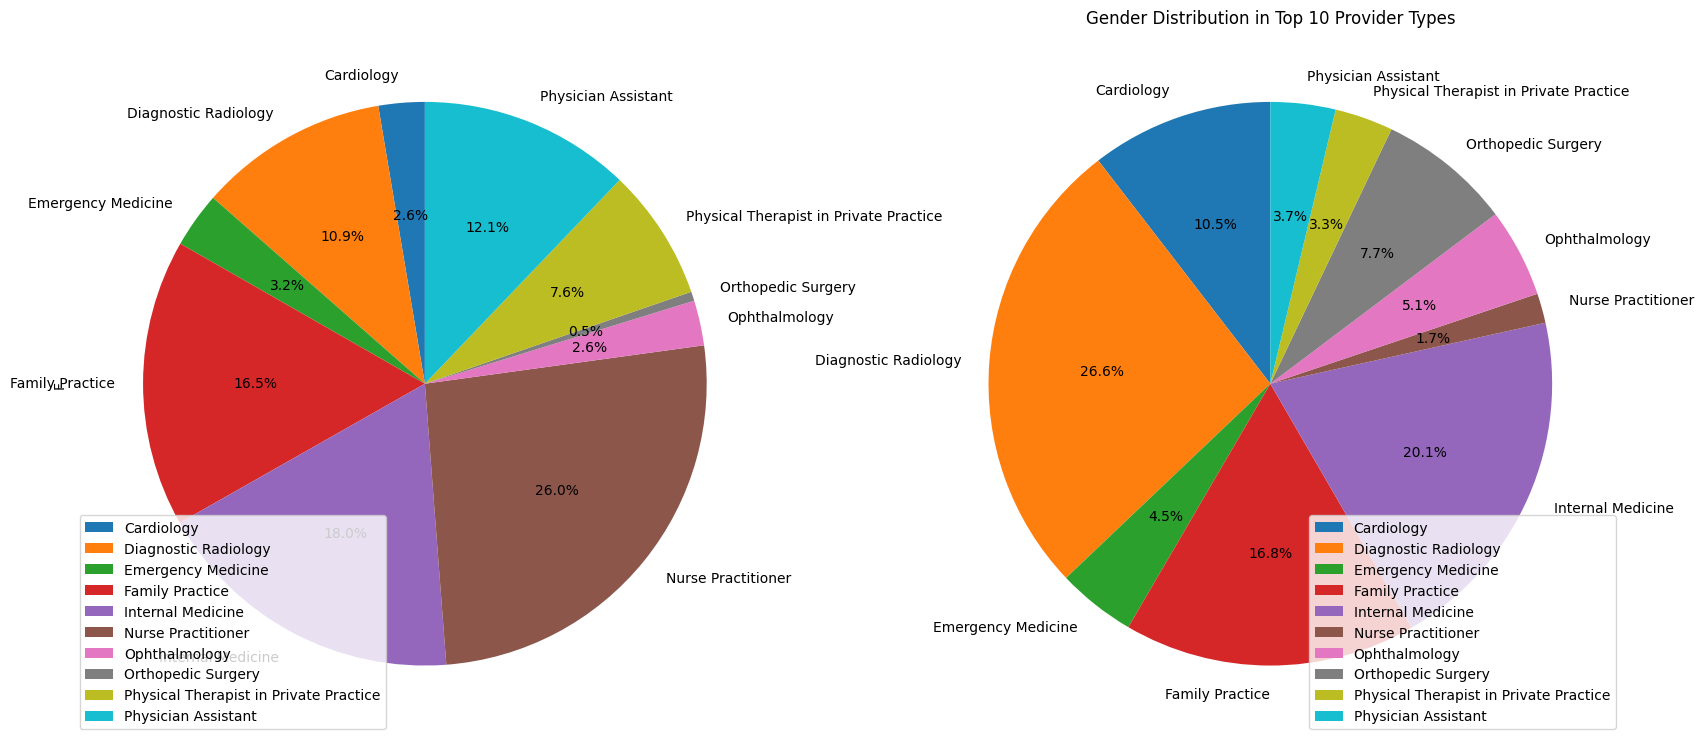

In [8]:
import matplotlib.pyplot as plt

top_10_provider_types = df['Provider Type'].value_counts().head(10).index

top_10_df = df[df['Provider Type'].isin(top_10_provider_types)]
gender_counts = top_10_df.groupby(['Provider Type', 'Gender of the Provider']).size().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(20, 20))
gender_counts.plot(kind='pie', subplots=True, ax=ax, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution in Top 10 Provider Types')
plt.ylabel('')
plt.show()

•	Through the above pi chat we can understang that hoe many male percentage and female percentage for the each provider type but for the clear understanding I have only conserdier the top 10 provider types.

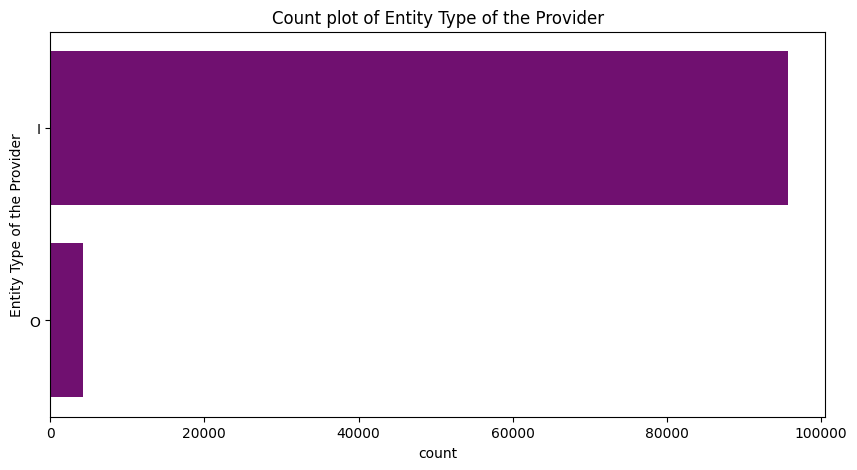

In [ ]:
categorical_cols = ['Entity Type of the Provider']
plot_countplots(df, categorical_cols)

•	Here the most of the individual providers are higher than the organizations.

•	Through the graph we can observe that their are more number of individual providers and less number of organization who provide health care services.

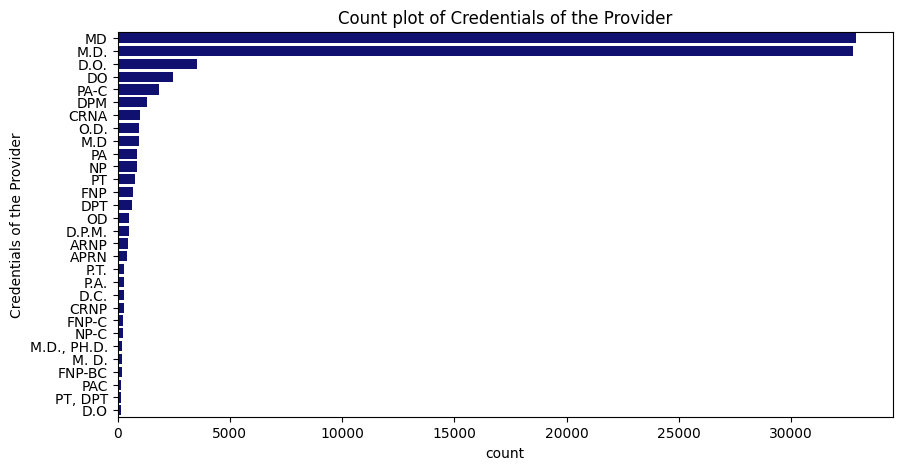

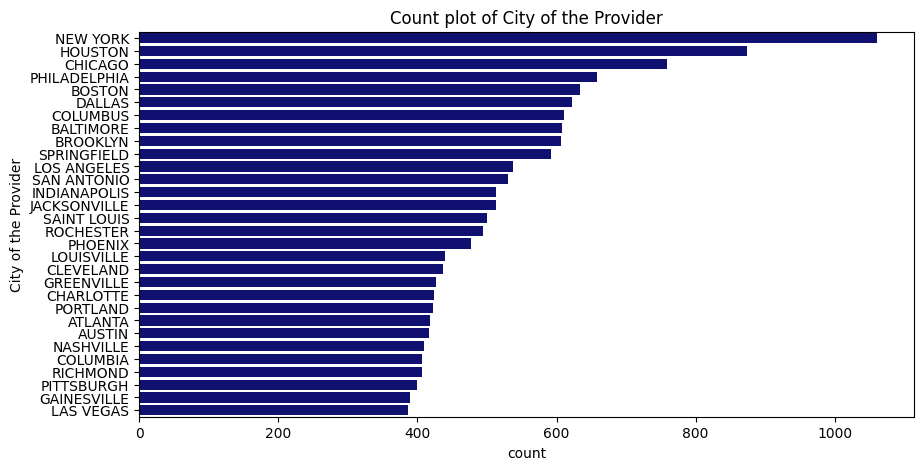

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot count plots for categorical features

def plot_countplots(df, categorical_cols):
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        top_values = df[col].value_counts().nlargest(30).index
        sns.countplot(y=df[col], order=top_values,color = 'navy')
        plt.title('Count plot of ' + col)
        plt.show()

categorical_cols = [
    'Credentials of the Provider',
    'City of the Provider'
]
plot_countplots(df, categorical_cols)



•	Certain states have a significantly higher number of providers and the highest is over 7775 for stete CA.

•	Some states have very few providers listed as and the least number of providers are in the state AA  over 234.

•	In this graph its showing that how many providers are there for each state.

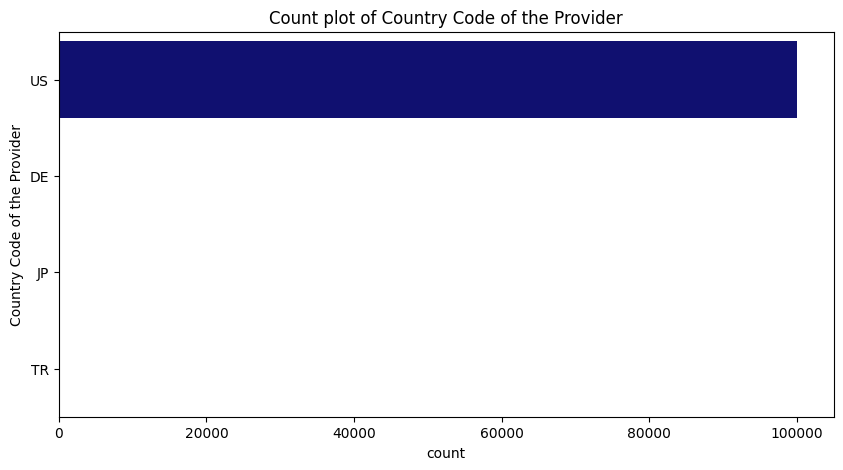

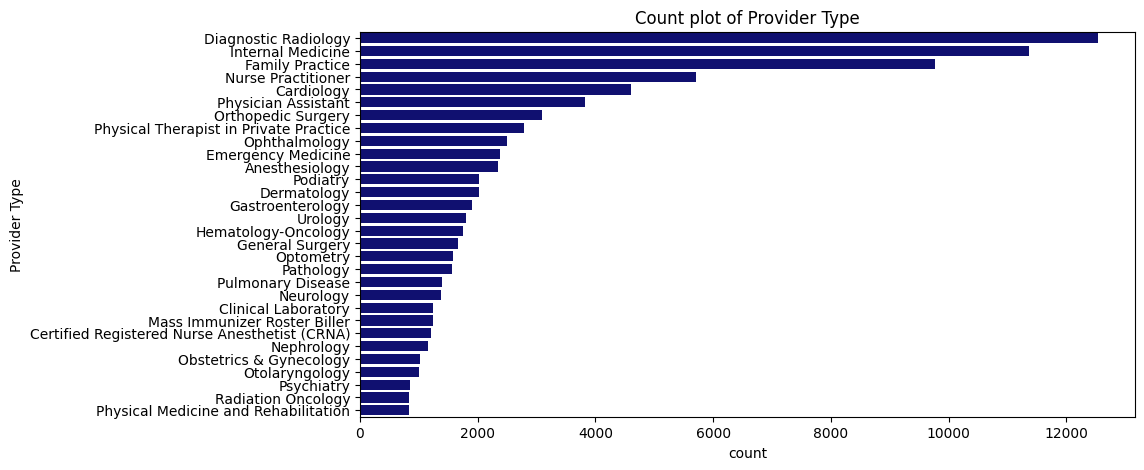

In [ ]:
categorical_cols = ['Country Code of the Provider',
    'Provider Type',
]
plot_countplots(df, categorical_cols)

•	We can actually see through the graph the most of the providers who have done their credentials as MD.

•	There are least number of providers who have done their credentials as FNP-BC.

•	These are the top 20  healthcare providers New york has taken   position throughout the US.

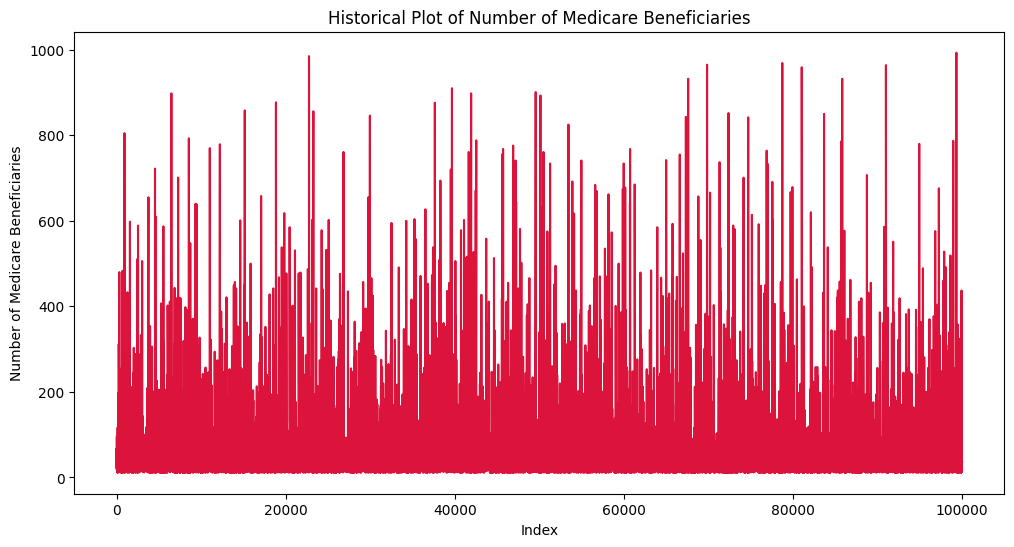

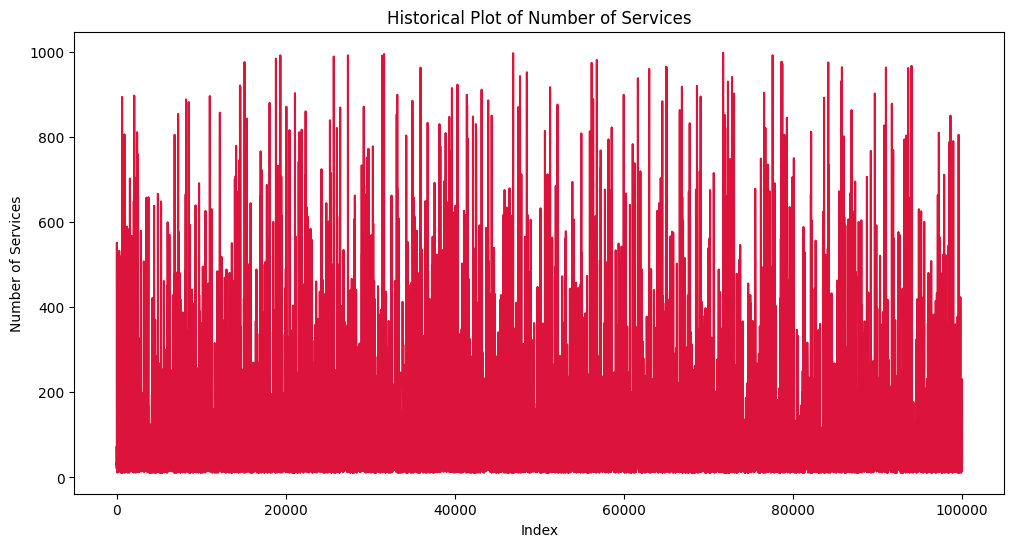

In [ ]:
df.columns = df.columns.str.strip()

numerical_cols = [
    'Number of Medicare Beneficiaries',
    'Number of Services'
]

for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Column {col} not found in the dataset.")


df_sample = df.sample(n=10000, random_state=1)

def plot_historical(df, col):
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df, x=df.index, y=col,color = 'crimson')
        plt.title(f'Historical Plot of {col}')
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Column {col} not found in the dataset.")

for col in numerical_cols:
    plot_historical(df_sample, col)


•	This graph simply indicates the historical data of Medicare Beneficiaries.

•	This graph simply indicates the historical data of Medicare Beneficiaries.


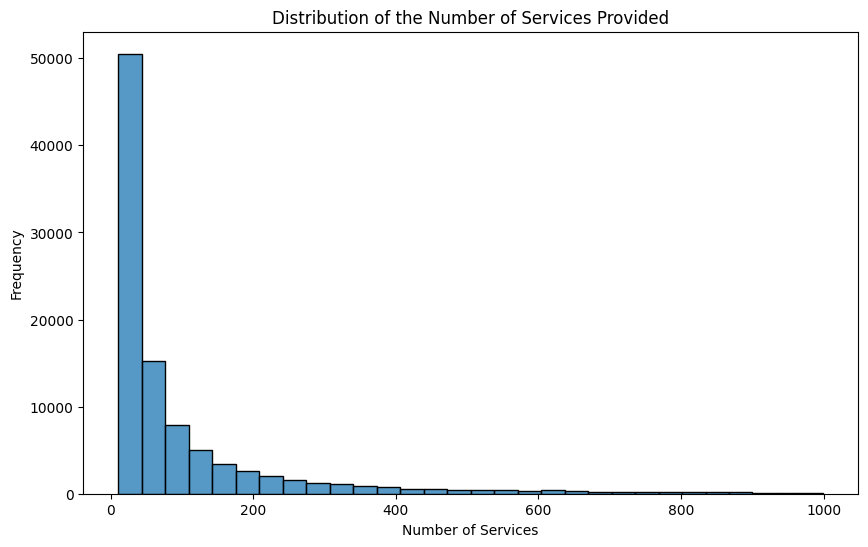

In [ ]:
top_hcpcs_codes = df['Number of Services'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Services'], bins=30, kde=False)
plt.title('Distribution of the Number of Services Provided')
plt.xlabel('Number of Services')
plt.ylabel('Frequency')
plt.show()


•there are more number of services that have be provided throught out the US.

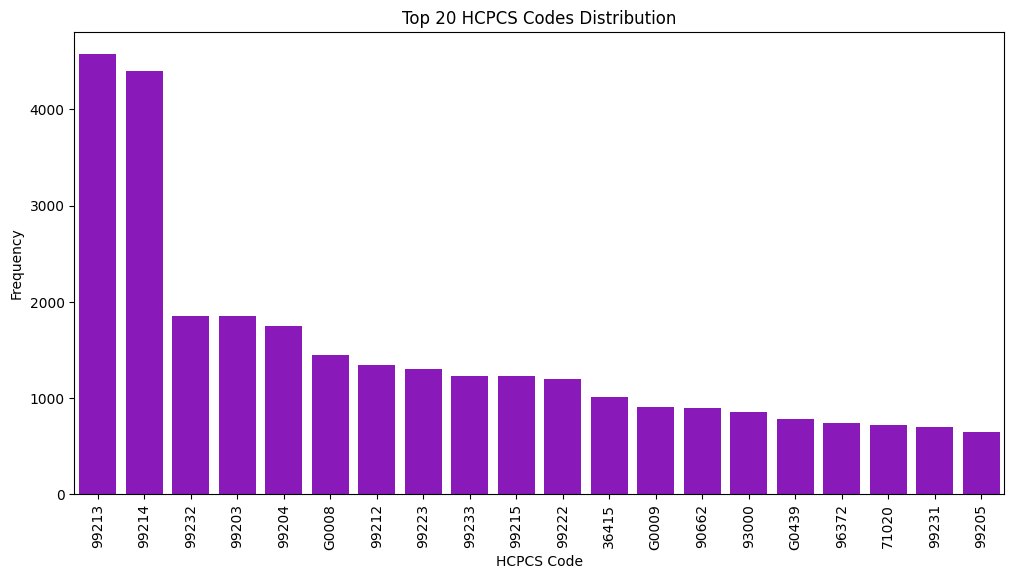

In [ ]:
top_hcpcs_codes = df['HCPCS Code'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hcpcs_codes.index, y=top_hcpcs_codes.values,color='darkviolet')
plt.title('Top 20 HCPCS Codes Distribution')
plt.xlabel('HCPCS Code')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()



•	This codes are essential for facilitating communication between healthcare providers and insures for the types of care provided, so that this graph represents the top 20 distribution code.

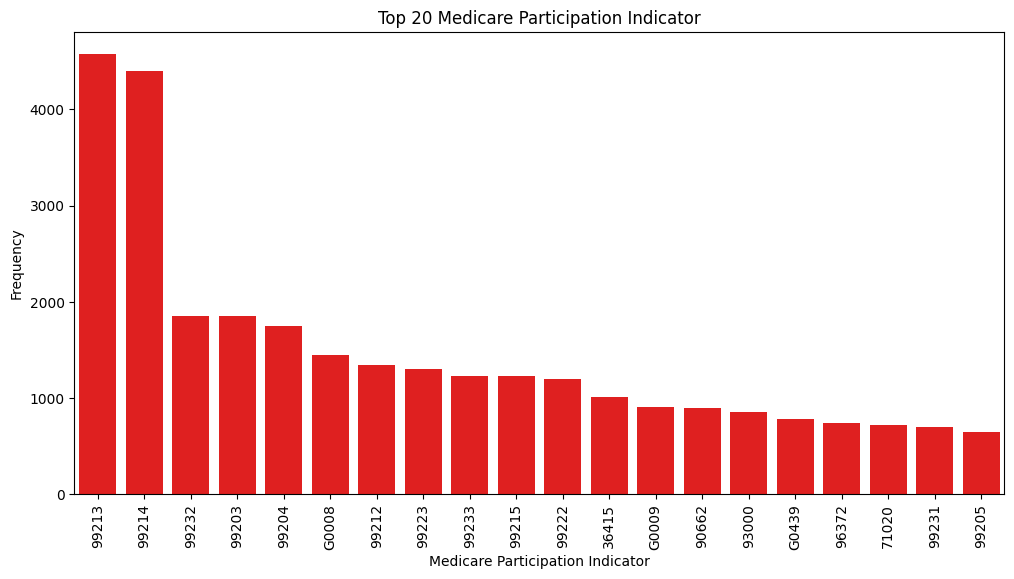

In [ ]:
medicare_codes = df['Medicare Participation Indicator'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hcpcs_codes.index, y=top_hcpcs_codes.values, color='red')
plt.title('Top 20 Medicare Participation Indicator')
plt.xlabel('Medicare Participation Indicator')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


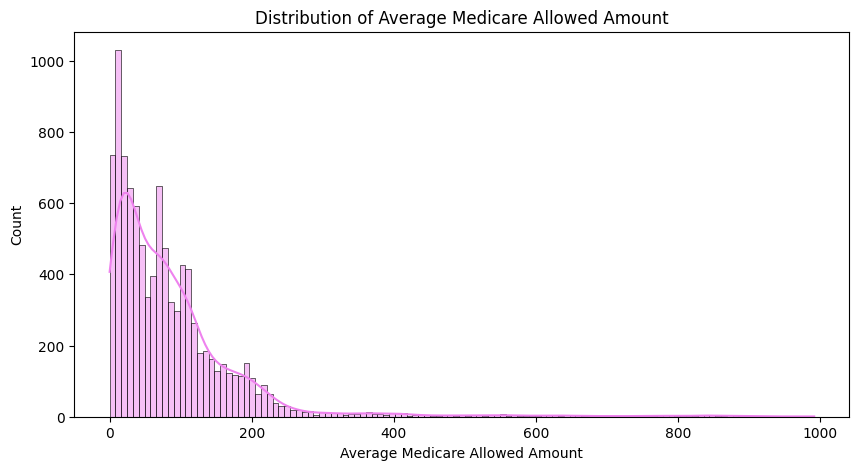

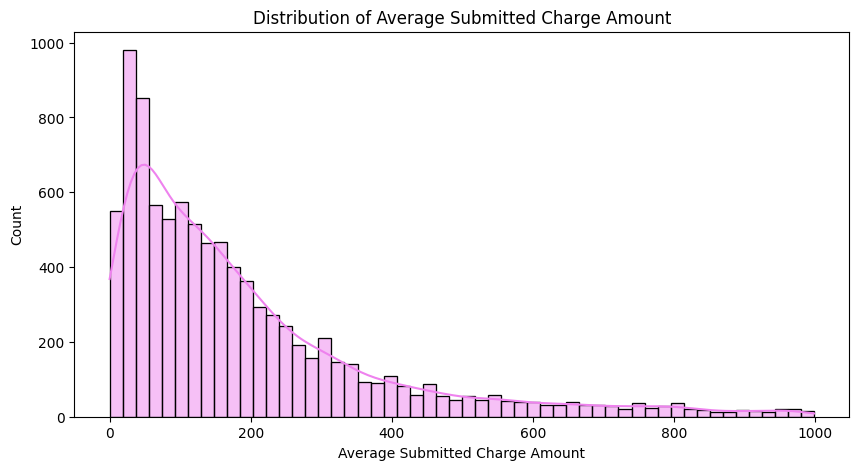

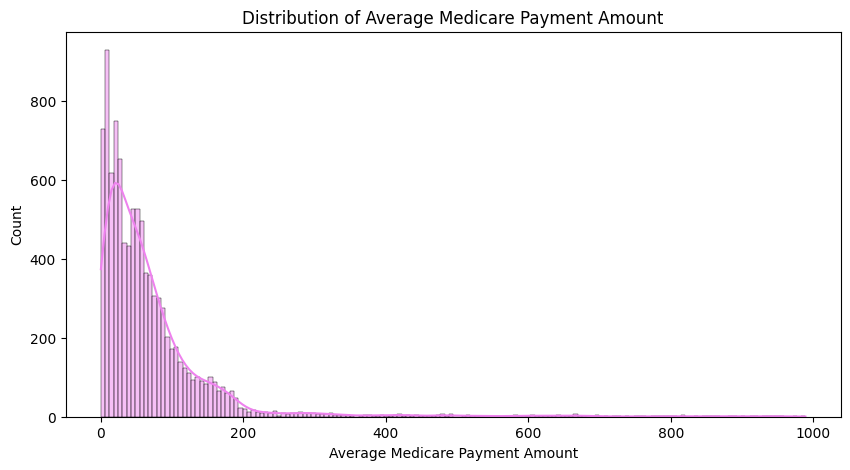

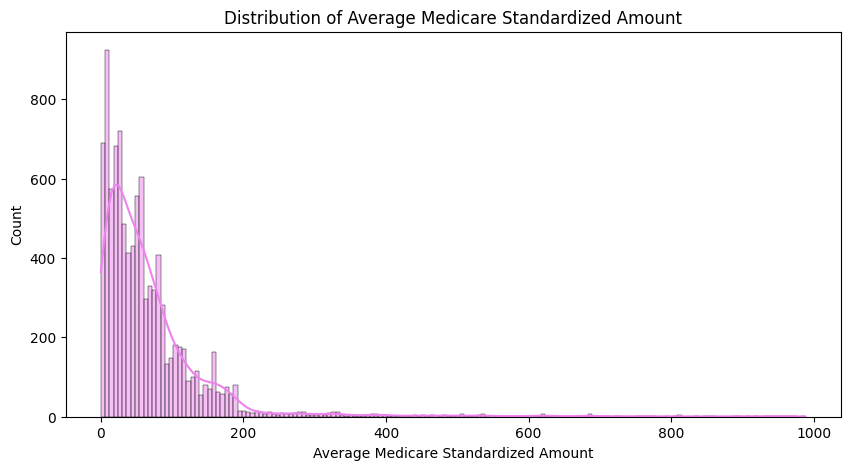

In [ ]:
numerical_cols = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Optional: Sample the data if it's too large (e.g., 10,000 rows)
df_sample = df.sample(n=10000, random_state=1)

def plot_distributions(df, cols):
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(df[col],kde=True,color='violet')
            plt.title(f'Distribution of {col}')
            plt.show()
        else:
            print(f"Column {col} not found in the dataset.")


# Plot distributions for specific numerical features
plot_distributions(df_sample, numerical_cols)


•	average medicare allowed amount graph represents the numerical column values and those varies from 0-1000 in Average Medicare Allowed Amount.

•average medicare payment amount graph shows the amount that the payments
done by the visited peoples.

In [ ]:
print(df.dtypes)

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
Street Address 2 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                   

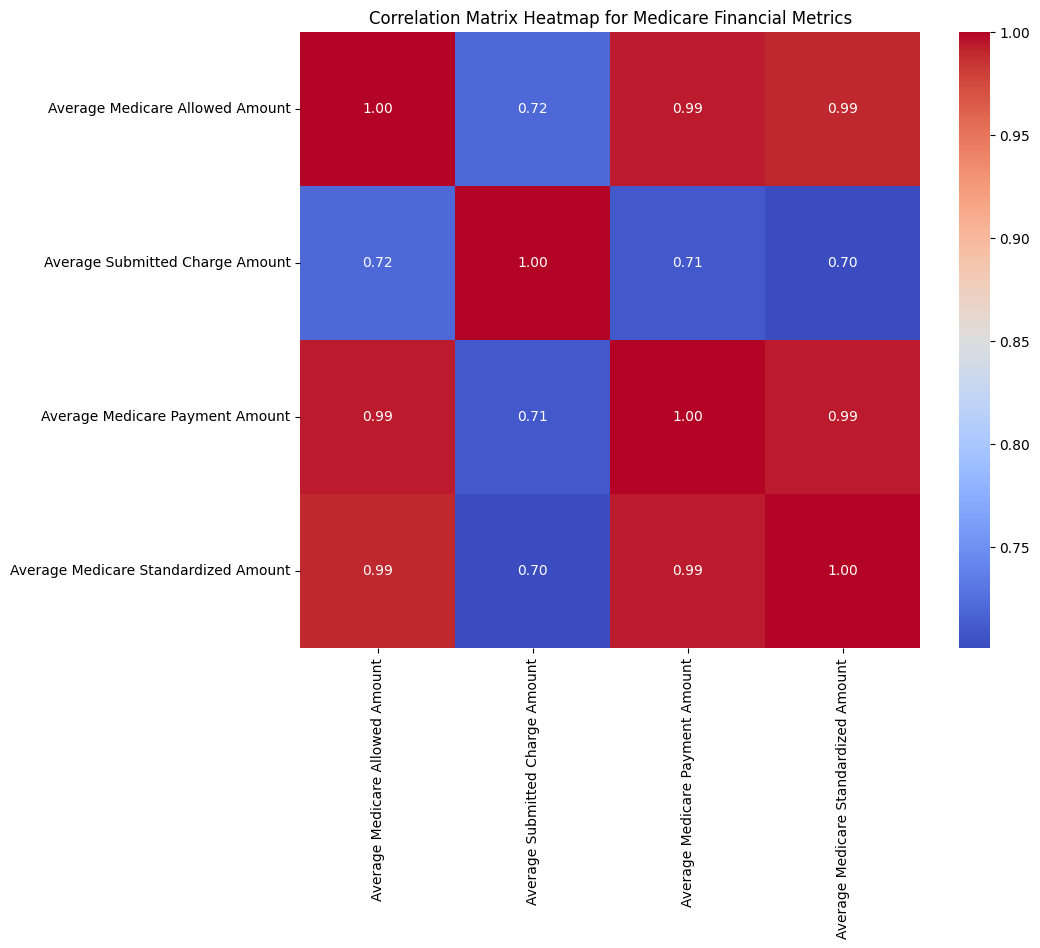

In [ ]:
numerical_cols = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap for Medicare Financial Metrics')
plt.show()


•	Here the heatmap show the correlation for the the numerical columns in the dataset.

•	Most of the numerical columns have the higest correlations as 1.0 and the least value id 0.70.


Correlation between Full Name and Credentials of the Provider: 0.03827705045348168


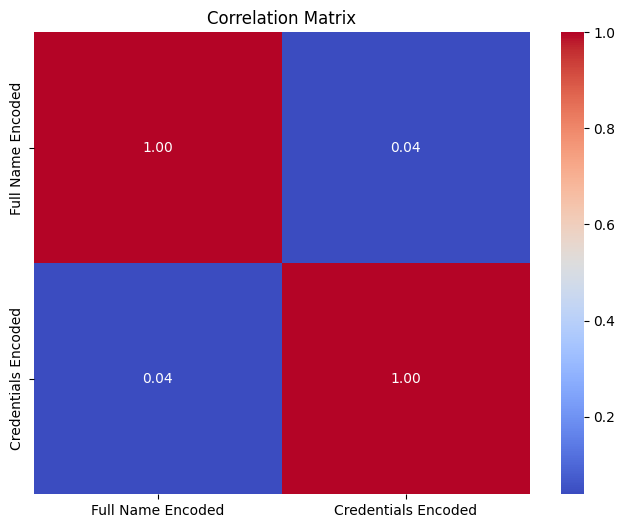

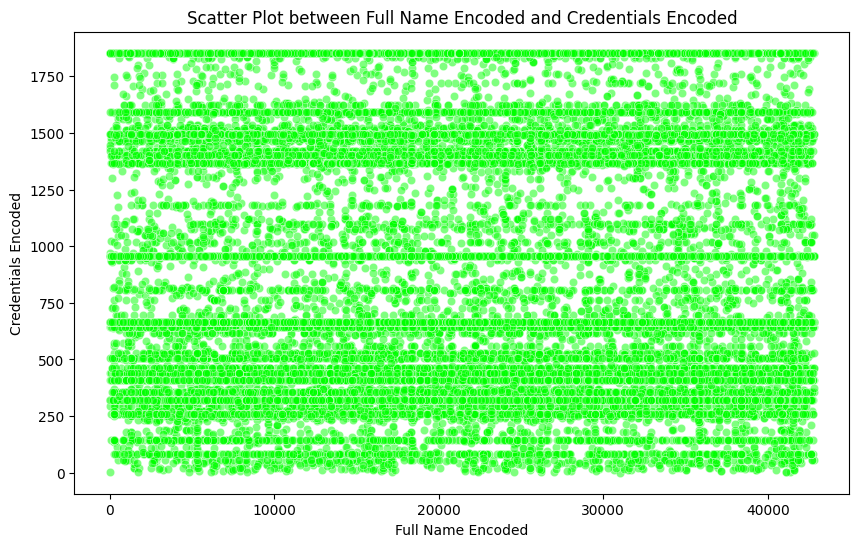

In [ ]:
from sklearn.preprocessing import LabelEncoder
df.columns = df.columns.str.strip()

label_encoder_full_name = LabelEncoder()
label_encoder_credentials = LabelEncoder()

# Encode 'Full Name' and 'Credentials of the Provider'
df['Full Name Encoded'] = label_encoder_full_name.fit_transform(df['Last Name/Organization Name of the Provider'])
df['Credentials Encoded'] = label_encoder_credentials.fit_transform(df['Credentials of the Provider'])

correlation = df[['Full Name Encoded', 'Credentials Encoded']].corr().iloc[0, 1]
print('Correlation between Full Name and Credentials of the Provider:', correlation)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Full Name Encoded', 'Credentials Encoded']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot the scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Full Name Encoded', y='Credentials Encoded', data=df, alpha=0.5,color = 'lime')
plt.title('Scatter Plot between Full Name Encoded and Credentials Encoded')
plt.xlabel('Full Name Encoded')
plt.ylabel('Credentials Encoded')
plt.show()


•	Correlation marix heatmap for the provider and the credentials of the provider and the correlation is : 0.038277050453.

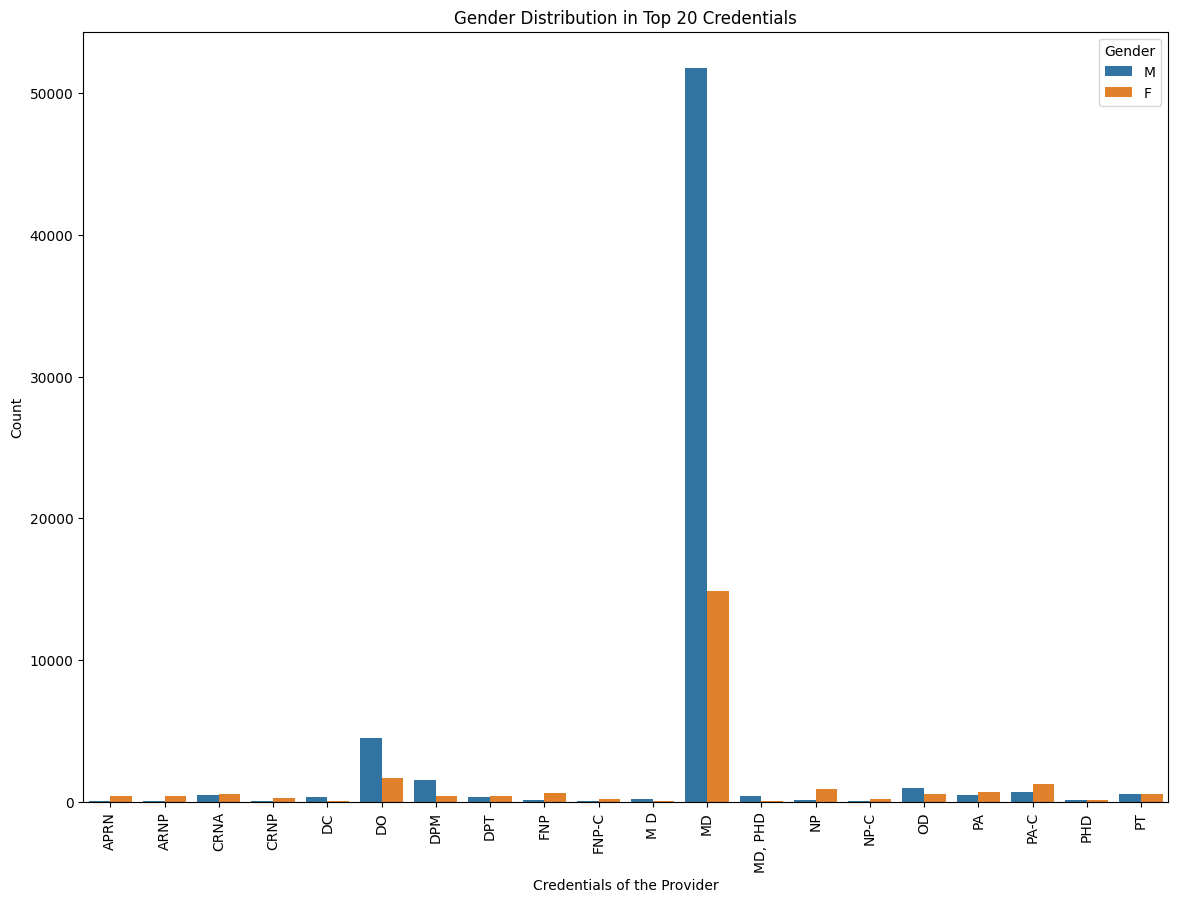

In [10]:
import seaborn as sns
df['Credentials of the Provider'] = df['Credentials of the Provider'].str.replace('.','', regex=False)

credentials_counts = df['Credentials of the Provider'].value_counts().head(20).index

top_20_credentials_df = df[df['Credentials of the Provider'].isin(credentials_counts)]
gender_counts_credentials = top_20_credentials_df.groupby(['Credentials of the Provider', 'Gender of the Provider']).size().unstack().fillna(0)

gender_counts_credentials = gender_counts_credentials.reset_index()
gender_counts_credentials = pd.melt(gender_counts_credentials, id_vars=['Credentials of the Provider'], value_vars=['M', 'F'], var_name='Gender', value_name='Count')

# Plotting
plt.figure(figsize=(14, 10))
sns.barplot(x='Credentials of the Provider', y='Count', hue='Gender', data=gender_counts_credentials)
plt.title('Gender Distribution in Top 20 Credentials')
plt.xticks(rotation=90)
plt.show()

• through the relation ship most of the male providers and the female providers have done there MD.

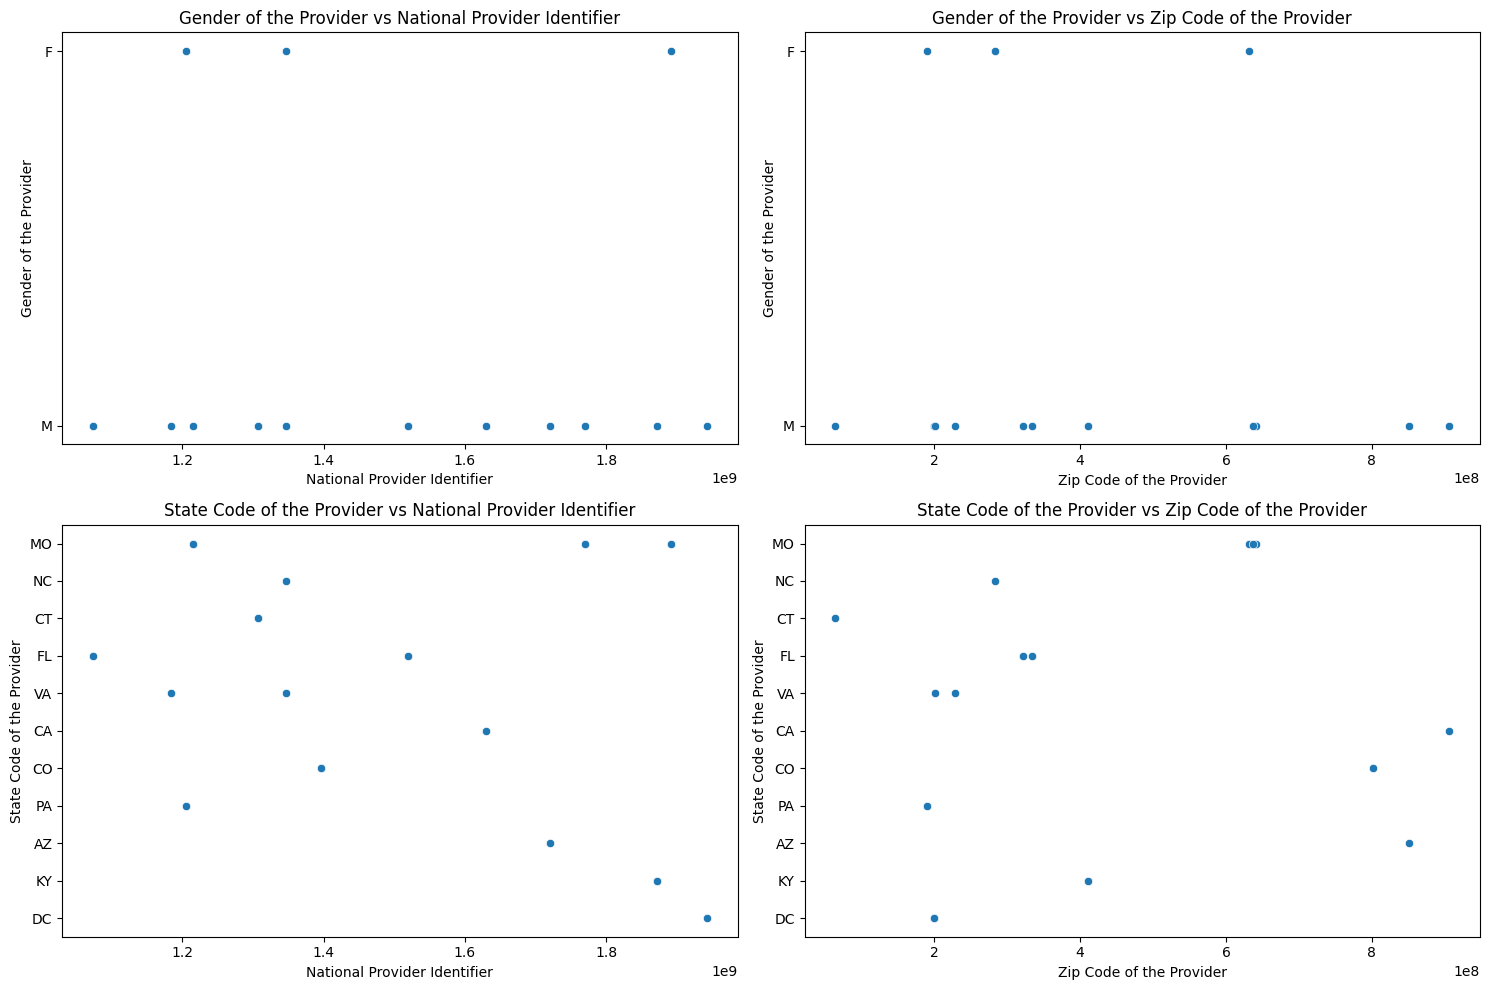

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


subset_df = df.head(15)

# Select two categorical and two numerical columns
cat_cols = ['Gender of the Provider', 'State Code of the Provider']
num_cols = ['National Provider Identifier', 'Zip Code of the Provider']

# Plot correlation graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, cat_col in enumerate(cat_cols):
    for j, num_col in enumerate(num_cols):
        sns.scatterplot(data=subset_df, x=num_col, y=cat_col, ax=axes[i, j])
        axes[i, j].set_title(cat_col + ' vs ' + num_col)

plt.tight_layout()
plt.show()

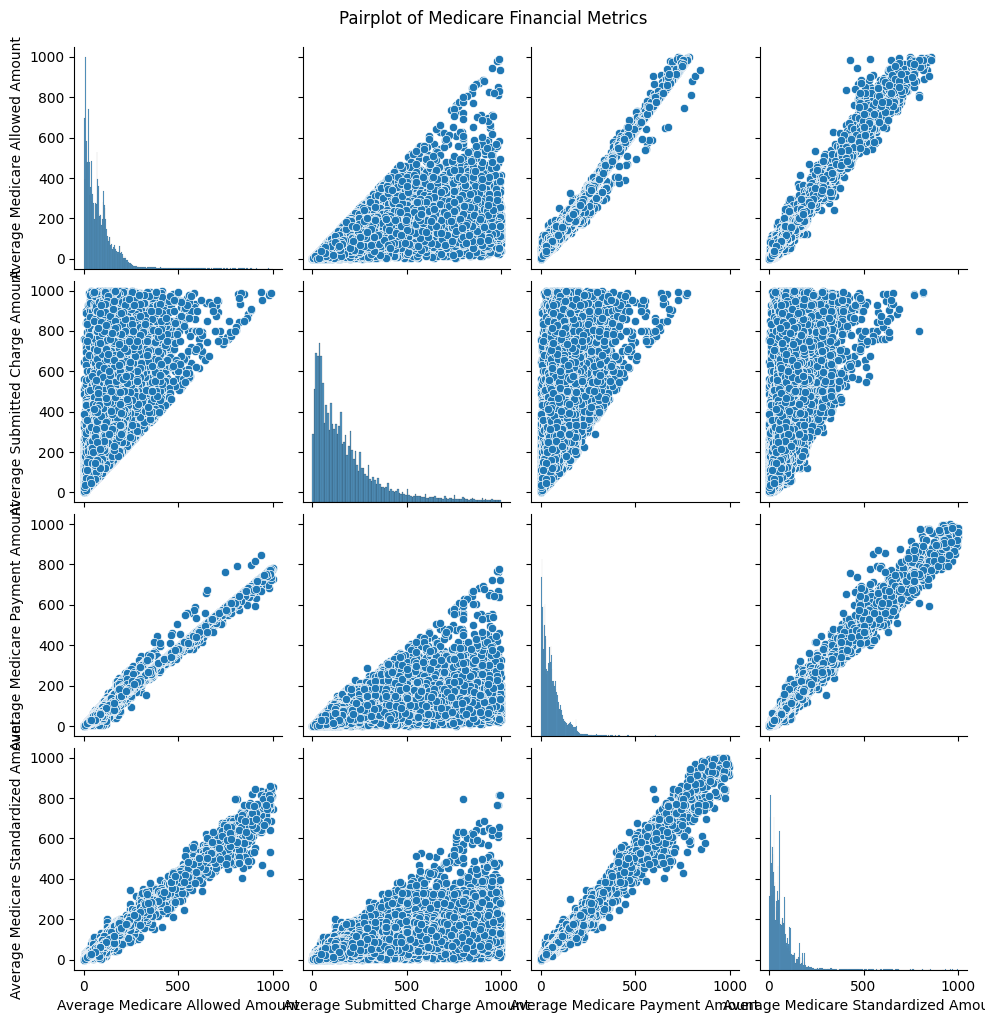

In [ ]:

numerical_cols = ['Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert the columns to numerical types
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure the columns exist in the dataframe and are numerical
for col in numerical_cols:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' is not present in the dataframe.")
    if not pd.api.types.is_numeric_dtype(df[col]):
        raise TypeError(f"Column '{col}' is not numerical. It is {df[col].dtype}.")

# Create the pairplot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Medicare Financial Metrics', y=1.02)  # Adjust title position
plt.show()


Average Medicare Allowed Amount         float64
Average Submitted Charge Amount         float64
Average Medicare Payment Amount         float64
Average Medicare Standardized Amount    float64
dtype: object


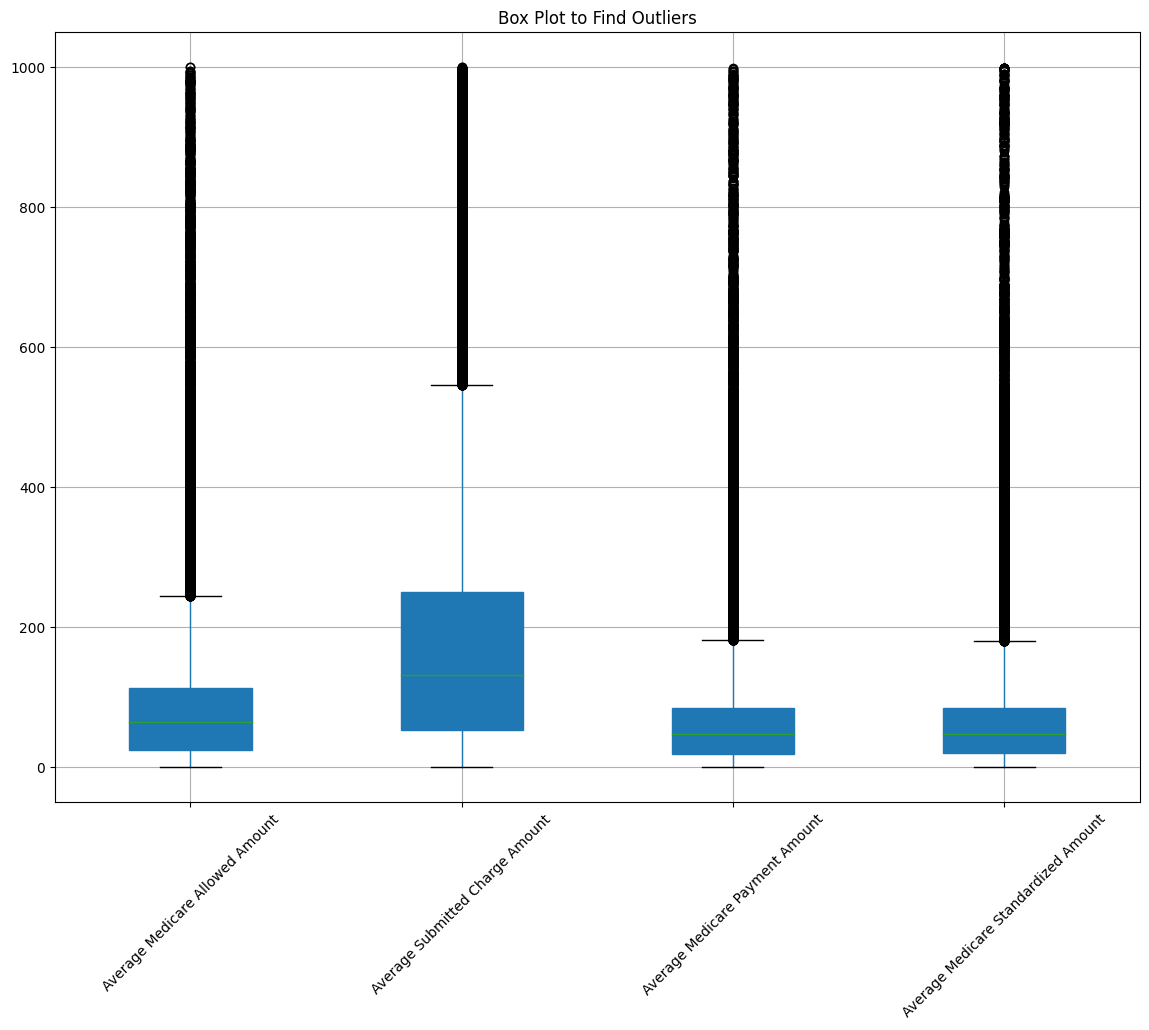

In [20]:
import matplotlib.pyplot as plt
numerical_cols = [
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
# Convert columns to numeric, coerce errors to NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[numerical_cols].dtypes)
plt.figure(figsize=(14, 10))
box = df[numerical_cols].boxplot(patch_artist=True)
plt.title('Box Plot to Find Outliers')
plt.xticks(rotation=45)
plt.show()


• There are several outliers in the "Number of Services" column, indicating that some providers have performed a significantly higher number of services compared to the majority.

• Similar to the "Number of Services" column, there are outliers indicating that some providers serve a significantly higher number of Medicare beneficiaries.

• There are a few outliers with higher allowed amounts, but the majority of the data points are clustered within a narrow range.

•The median value is relatively low compared to the outliers.

